<a href="https://colab.research.google.com/github/ElisabethDB/Eindopdracht-Deep-Learning/blob/main/2_Convnet_De_Bock_Elisabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

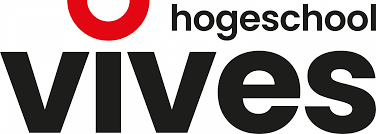<br>

**Deep Learning**<br>
Academiejaar 2022-2023<br>
De Bock Elisabeth

---

---


In [ ]:
#import libraries
import os, shutil, pathlib
import random
import math
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the root directory where the images are stored
rootdir= './drive/MyDrive/schilderijen' 

In [ ]:
# Set the categories (i.e. classes) of images
categories = ['Rubens', 'Picasso', 'Mondriaan']

In [ ]:
def plot_accuracy_los(accuracy, val_accuracy, loss,val_loss):
    epochs = range(1, len(accuracy) + 1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(epochs, accuracy, "b", label="Training accuracy")
    ax1.plot(epochs, val_accuracy, "r", label="Validation accuracy")
    ax1.set_title("Accuracy")
    ax1.legend();

    ax2.plot(epochs, loss, "b", label="Training loss")
    ax2.plot(epochs, val_loss, "r", label="Validation loss")
    ax2.set_title("Loss")
    ax2.legend();

In [ ]:
train_dataset = image_dataset_from_directory(
    os.path.join(rootdir, "train"),
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    os.path.join(rootdir, "validation"),
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    os.path.join(rootdir, "test"),
    image_size=(180, 180),
    batch_size=32)

Found 387 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [ ]:
import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)

        axs[i].legend()
        axs[i].grid()

#bron(https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5)

# Eenvoudige convnet

Listing 8.7 (p215)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3)) 
x = layers.Rescaling(1./255)(inputs)  # RGB waarden tussen 0 en 255 herschalen naar waarden tussen 0 en 1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x) #multiclass classification
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy",
    ]
  )

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/schilderijen_app/modellen/simple_covnet.keras",  # file waarin model wordt opgeslagen
    save_best_only=True,  # beste model wordt opgeslagen obv validation loss!
    monitor="val_loss")
]
callbacks_list = [PlotLearning(), callbacks]

13/13 [==============================] - 2s 94ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 1.5495 - val_accuracy: 0.7300


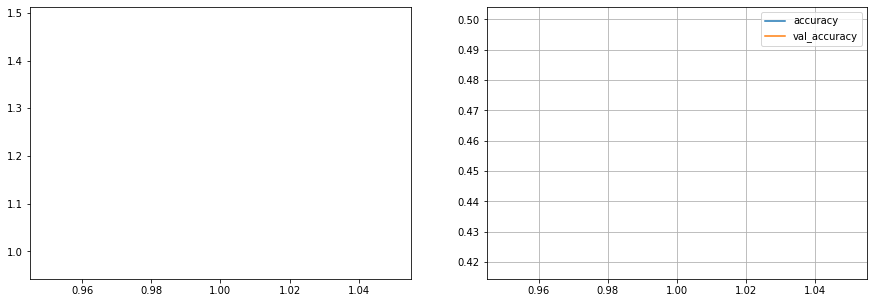

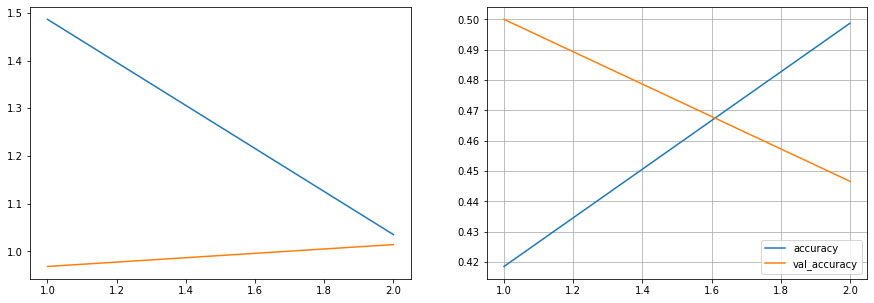

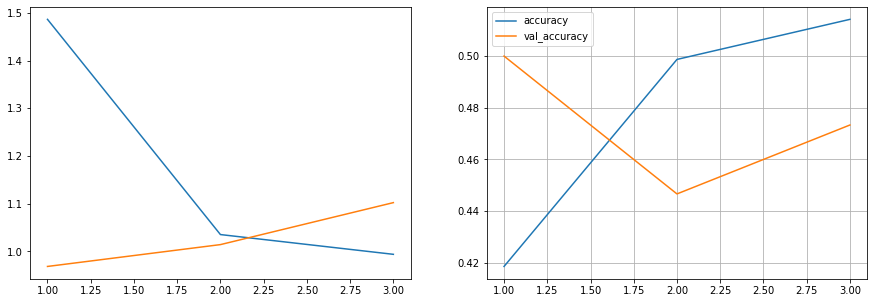

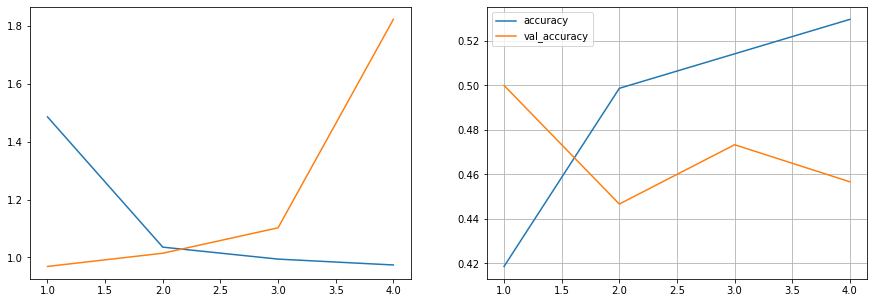

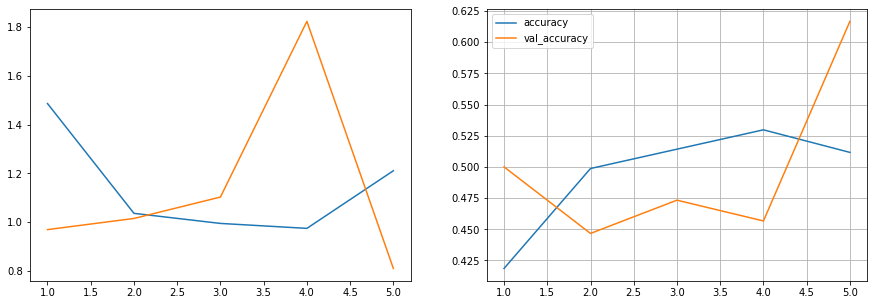

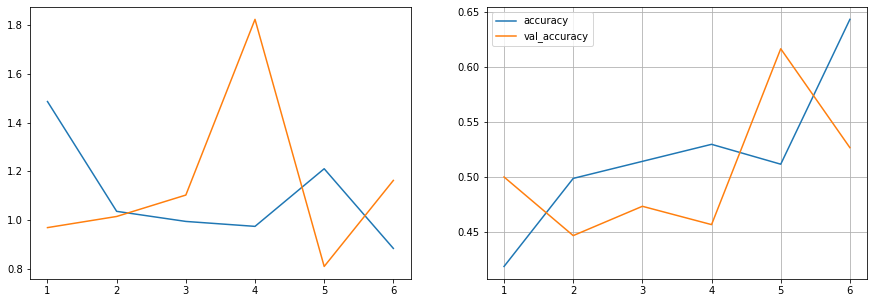

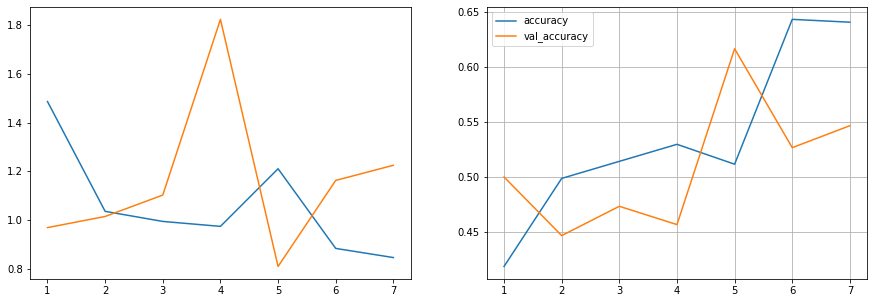

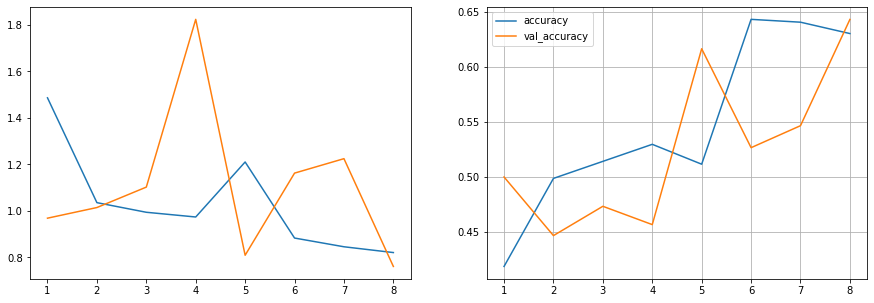

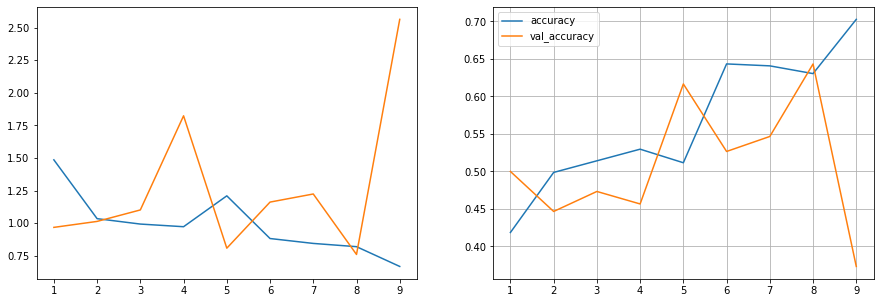

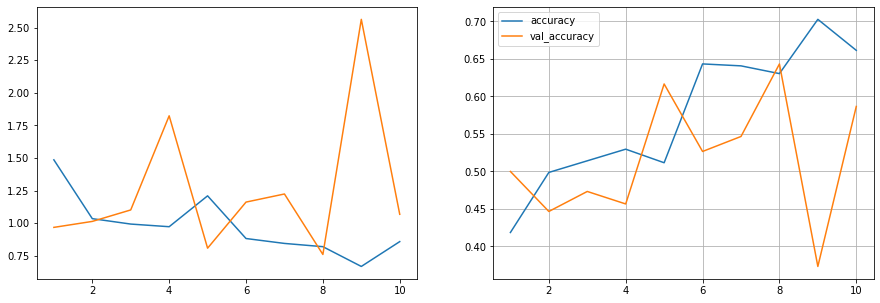

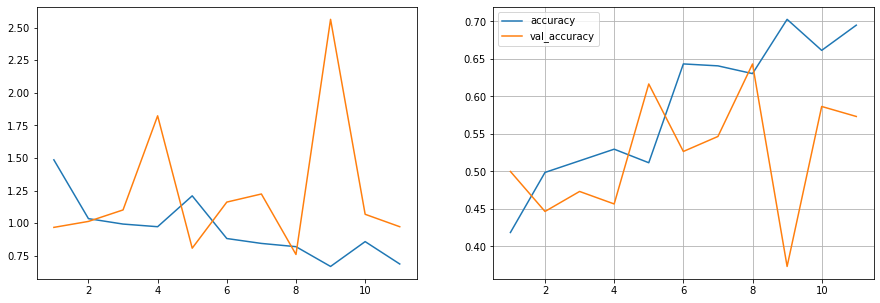

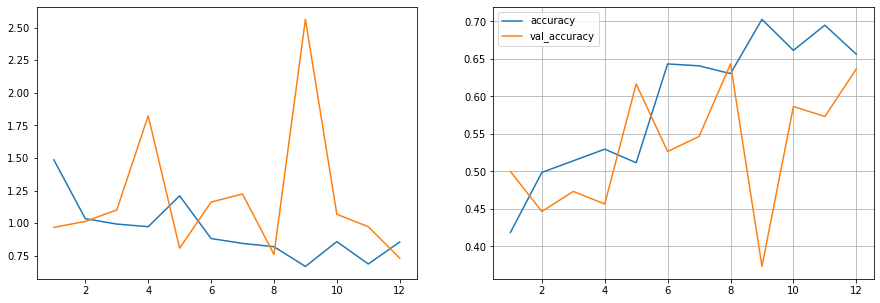

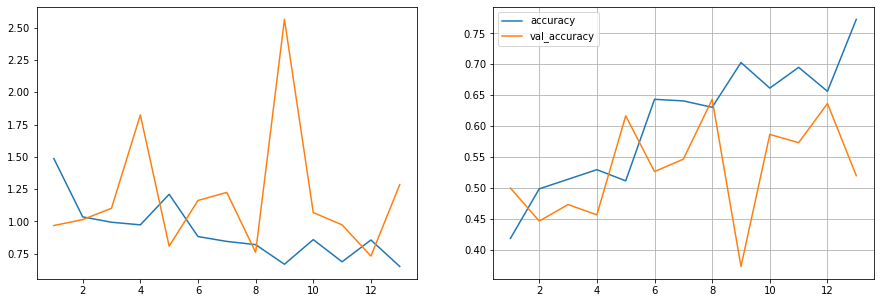

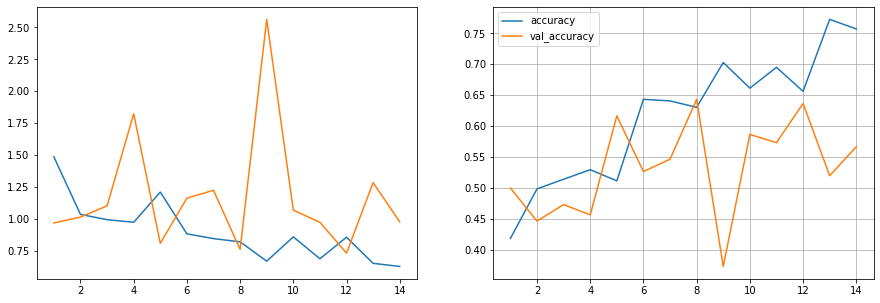

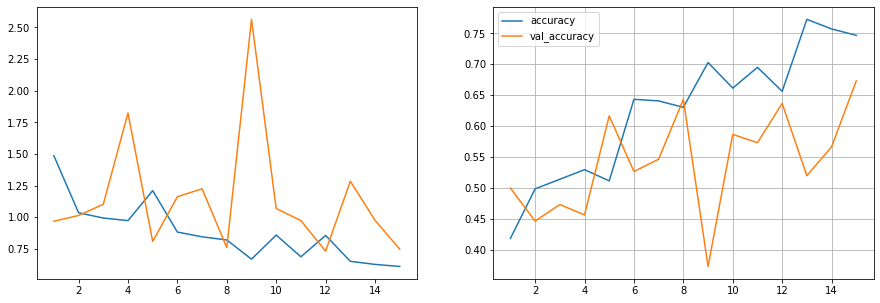

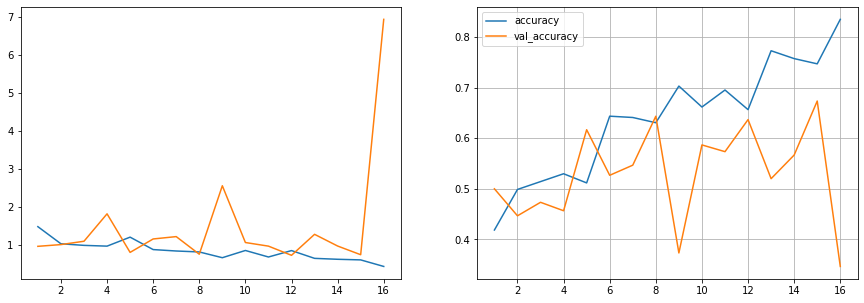

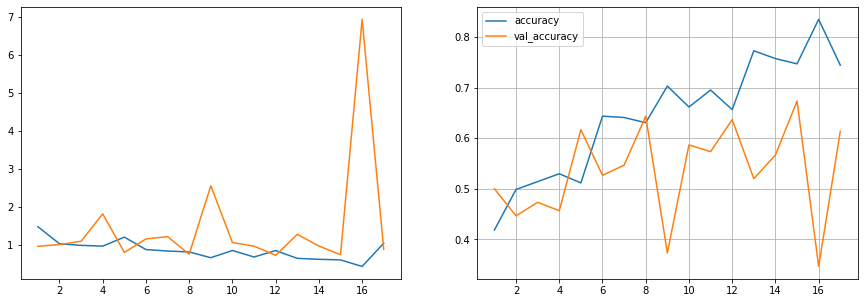

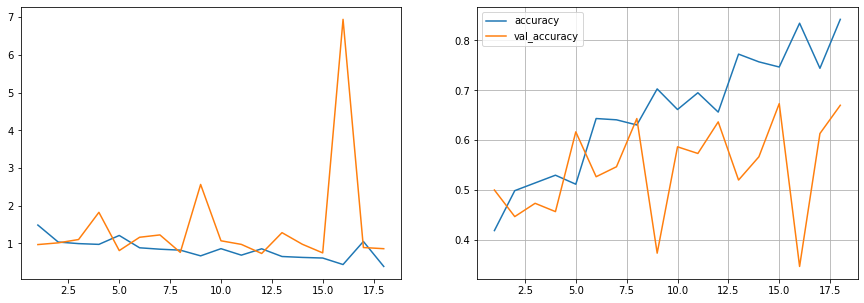

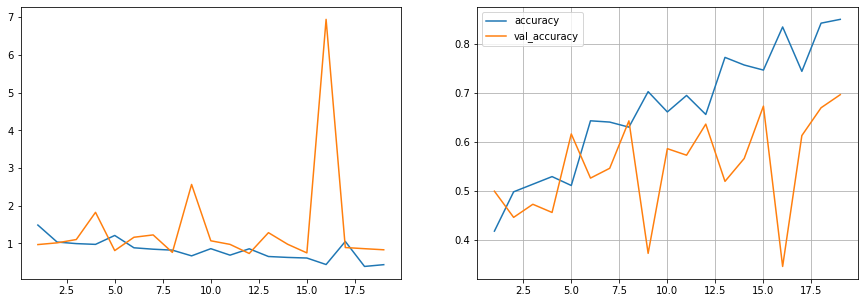

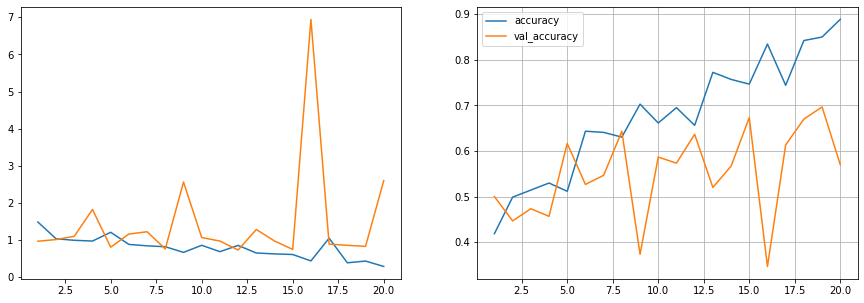

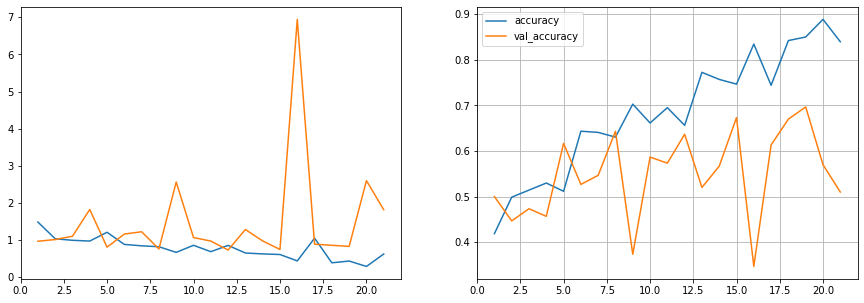

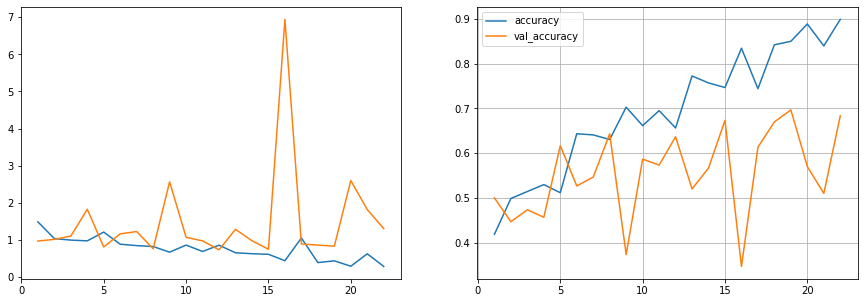

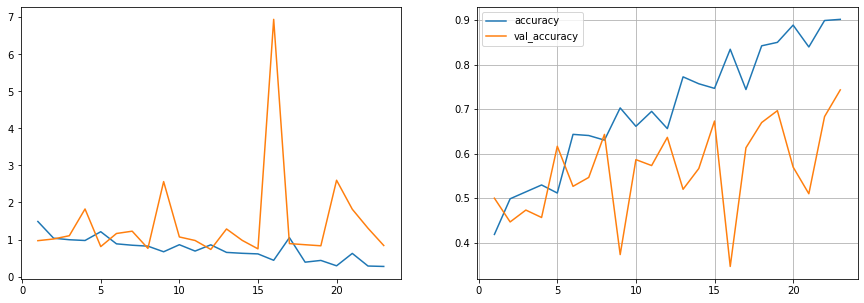

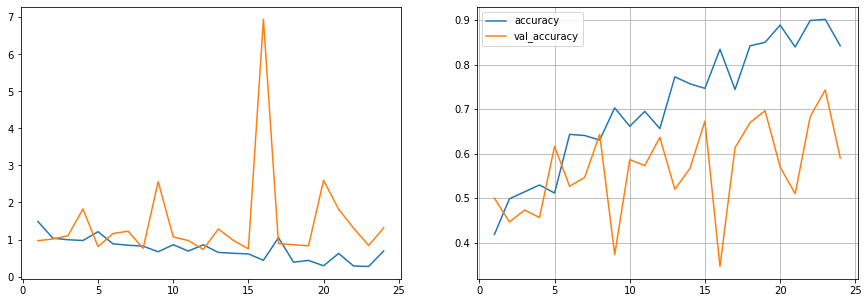

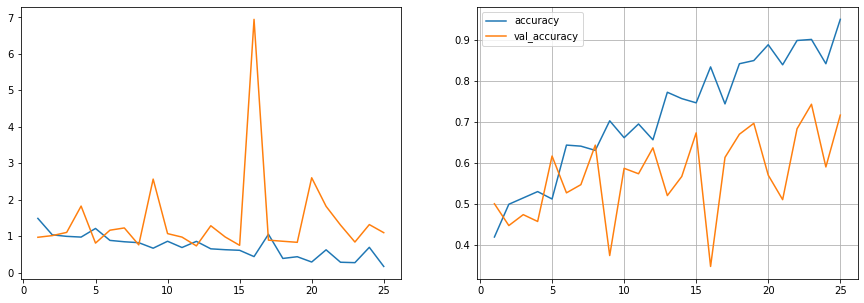

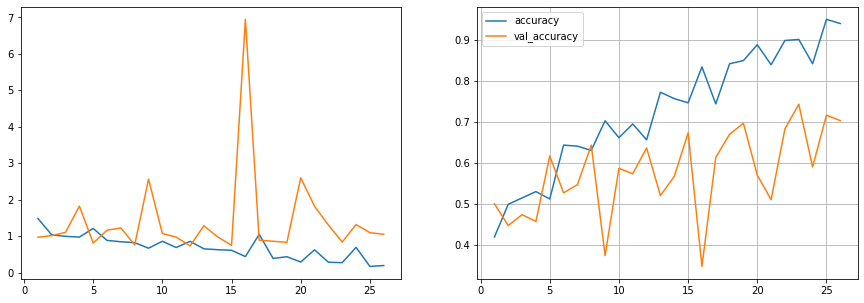

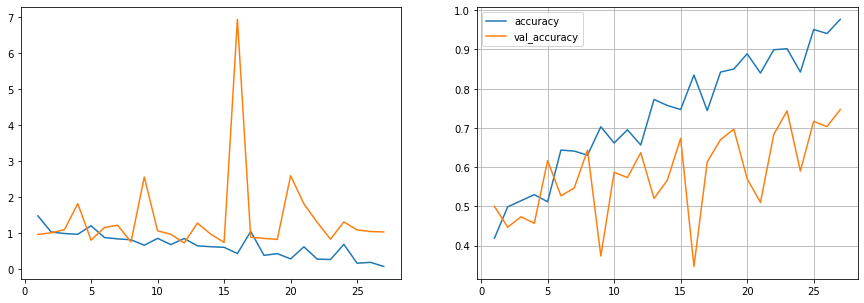

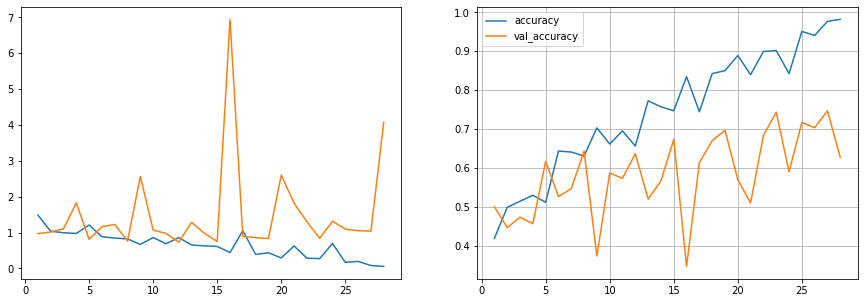

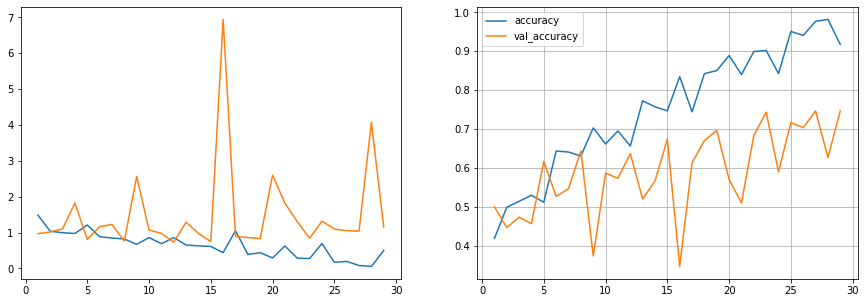

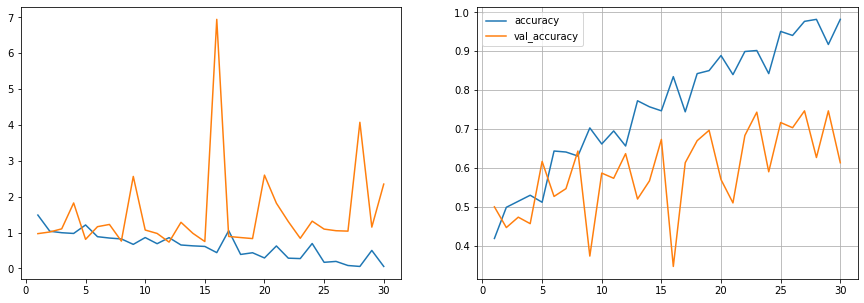

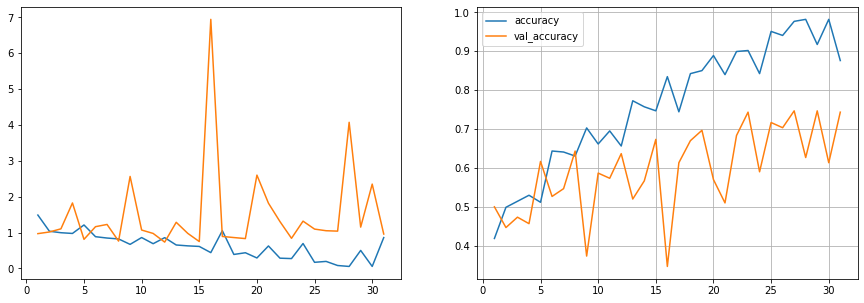

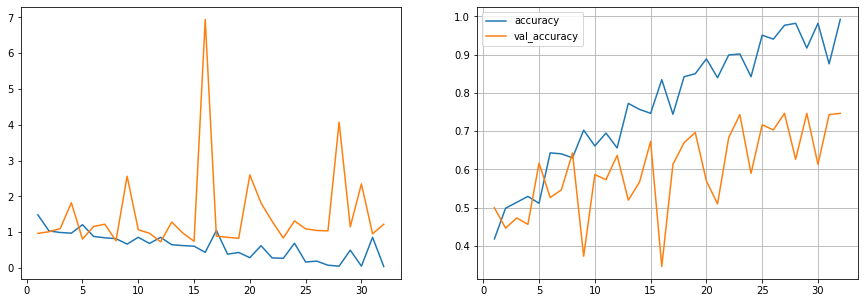

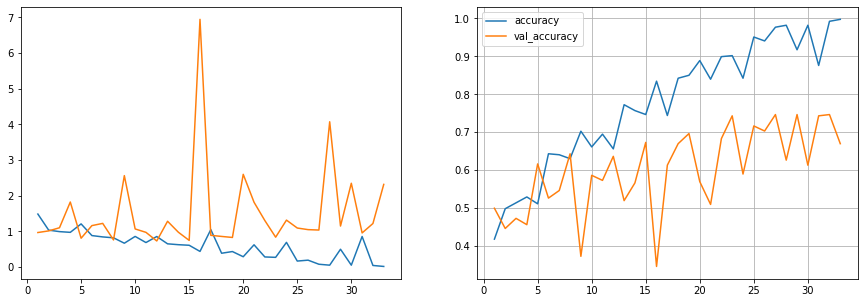

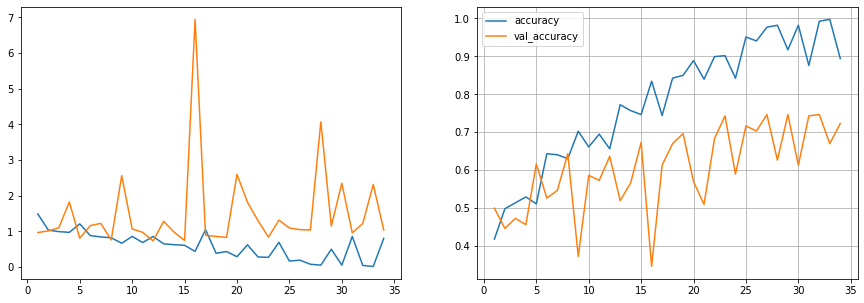

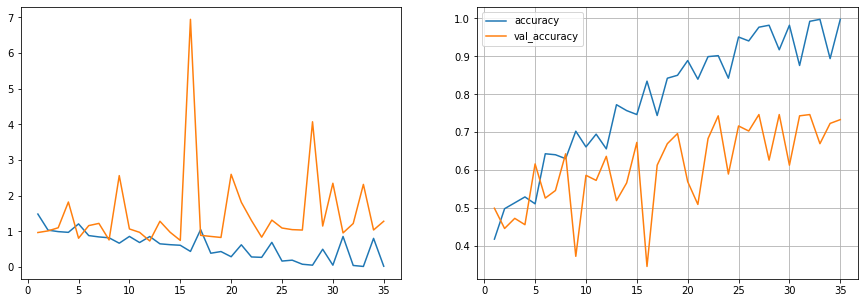

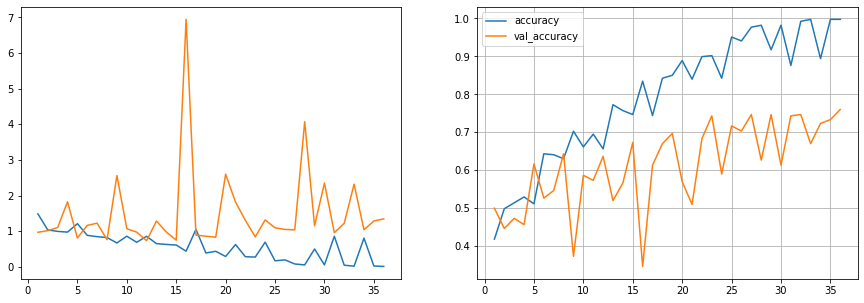

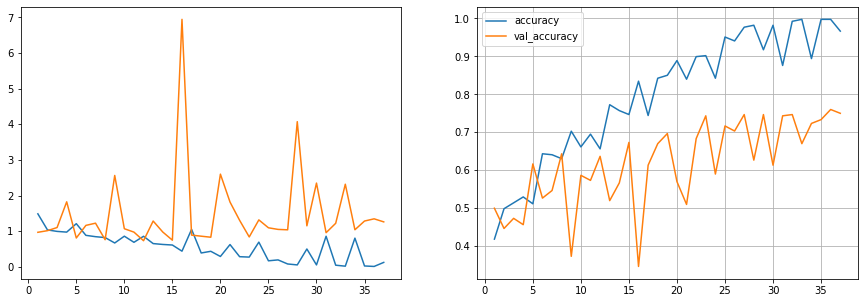

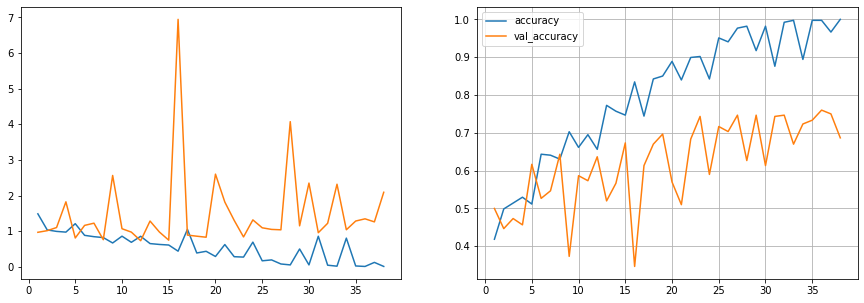

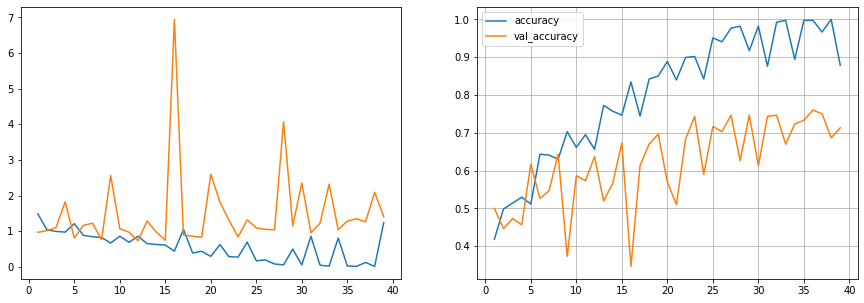

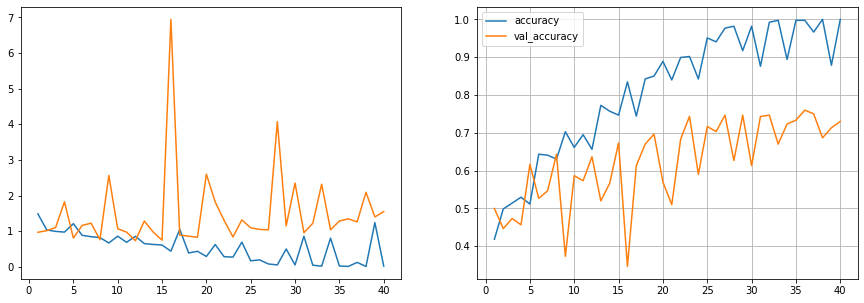

In [ ]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks_list
)

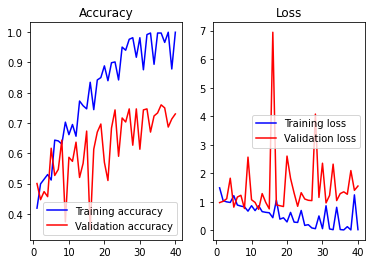

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plot_accuracy_los(accuracy, val_accuracy, loss,val_loss)

In [ ]:
test_model = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/simple_covnet.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

10/10 [==============================] - 24s 119ms/step - loss: 0.8760 - accuracy: 0.5800
Test accuracy: 0.580


1/1 [==============================] - 0s 226ms/step
Computer says: Mondriaan


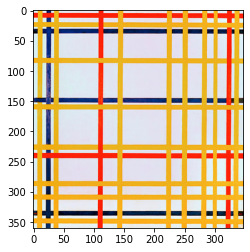

In [ ]:
import numpy as np
from PIL import Image

# Load the image and preprocess it
img = Image.open('/content/drive/MyDrive/Mondriaan/NewYorkCityI_Piet_Mondriaan.jpg')
img_new = img.resize((180, 180))  # Resize the image to 180*180
img_new = np.array(img_new) / 255.0  # Normalize the pixel values

# Make a prediction on the image
predictions = test_model.predict(np.expand_dims(img_new, axis=0))

# Determine the class with the highest probability
predicted_class = np.argmax(predictions)

# Map the integer class label to a string label
predicted_label = categories[predicted_class]

plt.imshow(img)
print(f"Computer says: {predicted_label}")

# Convnet met data augmentation
Listing 8.14 (p221) en 8.16 (p223)

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.5),
])

In [ ]:
inputs = keras.Input(shape=(180, 180, 3)) 
x = data_augmentation(inputs) # we voegen de data augmentation lagen toe aan ons model
x = layers.Rescaling(1./255)(x)  
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) # we voegen een dropout laag toe
outputs = layers.Dense(3, activation="softmax")(x) #multiclass classification
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
  )

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/schilderijen_app/modellen/covnet_aug.keras",  # file waarin model wordt opgeslagen
    save_best_only=True,  # beste model wordt opgeslagen obv validation loss!
    monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/40
13/13 [==============================] - 4s 167ms/step - loss: 1.3217 - accuracy: 0.4109 - val_loss: 1.0592 - val_accuracy: 0.4833
Epoch 2/40
13/13 [==============================] - 2s 127ms/step - loss: 1.0248 - accuracy: 0.5297 - val_loss: 5.2192 - val_accuracy: 0.3300
Epoch 3/40
13/13 [==============================] - 2s 115ms/step - loss: 1.4006 - accuracy: 0.4858 - val_loss: 0.9803 - val_accuracy: 0.4200
Epoch 4/40
13/13 [==============================] - 2s 110ms/step - loss: 0.9447 - accuracy: 0.5323 - val_loss: 1.0344 - val_accuracy: 0.3733
Epoch 5/40
13/13 [==============================] - 2s 117ms/step - loss: 1.0336 - accuracy: 0.5504 - val_loss: 0.9469 - val_accuracy: 0.4033
Epoch 6/40
13/13 [==============================] - 2s 130ms/step - loss: 0.9070 - accuracy: 0.5401 - val_loss: 0.8291 - val_accuracy: 0.6000
Epoch 7/40
13/13 [==============================] - 2s 108ms/step - loss: 0.8499 - accuracy: 0.6124 - val_loss: 1.1635 - val_accuracy: 0.4033
Epoch 

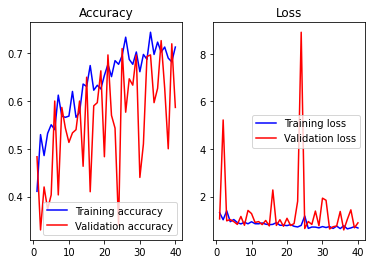

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plot_accuracy_los(accuracy, val_accuracy, loss,val_loss)

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/covnet_aug.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

10/10 [==============================] - 1s 23ms/step - loss: 0.8760 - accuracy: 0.5800
Test accuracy: 0.580


1/1 [==============================] - 0s 74ms/step
Computer says: Picasso


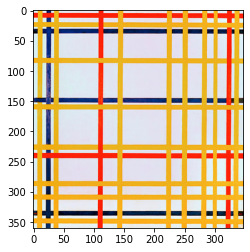

In [ ]:
# Load the image and preprocess it
img = Image.open('/content/drive/MyDrive/Mondriaan/NewYorkCityI_Piet_Mondriaan.jpg')
img_new = img.resize((180, 180))  # Resize the image to 64x64
img_new = np.array(img_new) / 255.0  # Normalize the pixel values

# Make a prediction on the image
predictions = model.predict(np.expand_dims(img_new, axis=0))

# Determine the class with the highest probability
predicted_class = np.argmax(predictions)

# Map the integer class label to a string label
predicted_label = categories[predicted_class]

plt.imshow(img)
print(f"Computer says: {predicted_label}")